<a href="https://colab.research.google.com/github/rafacarmo/clustering-enem/blob/main/enem2019DadosSelecionadosKmeansStandardScaler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Aplicação do algoritmo k-means com StandardScaler

Instalação de pacote para exibição do tempo de execução de cada bloco de código

In [ ]:
!pip install ipython-autotime
%load_ext autotime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 5.1 MB/s 
time: 607 µs (started: 2022-11-07 02:02:34 +00:00)


Import de pacotes utilizados para clusterização e visualização

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

%matplotlib inline
label_encoder = LabelEncoder()


time: 2.6 s (started: 2022-11-07 02:02:34 +00:00)


In [ ]:
year = '2019'

time: 928 µs (started: 2022-11-07 02:02:37 +00:00)


Leitura do dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ENEM/MICRODADOS_ENEM_2019.csv', 
                     encoding = 'ISO-8859-1', 
                     sep = ';')

time: 2min 13s (started: 2022-11-07 02:02:37 +00:00)


In [ ]:
df.shape

(5095270, 136)

time: 5.56 ms (started: 2022-11-07 02:04:50 +00:00)


In [ ]:
df.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001595656,2019,3552205,Sorocaba,35,SP,36.0,M,1,3,...,A,A,A,A,A,A,C,A,C,B
1,190001421546,2019,2910800,Feira de Santana,29,BA,23.0,M,1,1,...,A,A,A,B,A,A,E,A,A,B
2,190001133210,2019,2304400,Fortaleza,23,CE,39.0,F,1,3,...,A,A,A,B,A,A,C,A,A,B
3,190001199383,2019,1721000,Palmas,17,TO,25.0,F,1,1,...,A,A,A,C,A,B,D,A,B,B
4,190001237802,2019,3118601,Contagem,31,MG,22.0,F,1,1,...,B,A,A,B,A,A,C,B,B,B


time: 52.8 ms (started: 2022-11-07 02:04:50 +00:00)


Calcula média geral de notas

In [ ]:
df.loc[:,'MEDIA_GERAL'] = (df['NU_NOTA_CN'] + 
                                 df['NU_NOTA_CH'] + 
                                 df['NU_NOTA_LC'] + 
                                 df['NU_NOTA_MT'] + 
                                 df['NU_NOTA_REDACAO']) / 5.0

time: 76.4 ms (started: 2022-11-07 02:04:50 +00:00)


Seleciona somente as colunas que serão usadas (seleção igual ao artigo de Alessandro Aparecido Barcellos)

In [ ]:
df_filtrado = df[['Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006', 'Q007', 'Q008', 'Q009',
               'Q010', 'Q011', 'Q012', 'Q013', 'Q014', 'Q015', 'Q016', 'Q017', 'Q018',
               'Q019', 'Q020', 'Q021', 'Q022', 'Q023', 'Q024', 'Q025', 'SG_UF_RESIDENCIA', 'NU_IDADE', 
               'TP_SEXO', 'TP_COR_RACA', 'TP_DEPENDENCIA_ADM_ESC', 'MEDIA_GERAL']]

time: 1.72 s (started: 2022-11-07 02:04:50 +00:00)


In [ ]:
df_filtrado.shape

(5095270, 31)

time: 5.35 ms (started: 2022-11-07 02:04:52 +00:00)


Remove estudantes que possuem qualquer atributo com valor nulo.

In [ ]:
df_filtrado.dropna(axis=0, inplace=True)

time: 6.83 s (started: 2022-11-07 02:04:52 +00:00)


/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
df_filtrado.shape

(953889, 31)

time: 3.25 ms (started: 2022-11-07 02:04:59 +00:00)


In [ ]:
df_filtrado.head()

,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,...,Q022,Q023,Q024,Q025,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_DEPENDENCIA_ADM_ESC,MEDIA_GERAL
26,E,E,B,B,2,E,A,B,C,B,...,C,B,B,B,PR,17.0,F,1,4.0,722.58
28,E,B,B,B,3,A,A,B,D,A,...,D,A,B,A,RS,18.0,F,1,2.0,477.44
31,E,F,B,D,3,B,A,B,C,A,...,D,A,A,B,SP,17.0,F,2,2.0,498.76
34,E,C,B,B,2,B,A,B,C,A,...,C,A,A,B,BA,17.0,M,2,2.0,614.34
53,D,E,C,B,4,C,A,B,C,A,...,E,A,A,B,PB,18.0,M,3,2.0,422.28


time: 27.3 ms (started: 2022-11-07 02:04:59 +00:00)


Remove resposta "Não sei" do questionario Q001

In [ ]:
df_filtrado.drop(df_filtrado.loc[df_filtrado['Q001'] == 'H'].index, inplace=True)

time: 478 ms (started: 2022-11-07 02:04:59 +00:00)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df_filtrado.shape

(862062, 31)

time: 3.45 ms (started: 2022-11-07 02:04:59 +00:00)


Remove resposta "Não sei" do questionario Q002

In [ ]:
df_filtrado.drop(df_filtrado.loc[df_filtrado['Q002'] == 'H'].index, inplace=True)

time: 402 ms (started: 2022-11-07 02:04:59 +00:00)


Remove resposta "Não sei" do questionario Q003

In [ ]:
df_filtrado.drop(df_filtrado.loc[df_filtrado['Q003'] == 'F'].index, inplace=True)

time: 435 ms (started: 2022-11-07 02:05:00 +00:00)


Remove resposta "Não sei" do questionario Q004

In [ ]:
df_filtrado.drop(df_filtrado.loc[df_filtrado['Q004'] == 'F'].index, inplace=True)

time: 417 ms (started: 2022-11-07 02:05:00 +00:00)


In [ ]:
df_filtrado.head()

,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,...,Q022,Q023,Q024,Q025,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_DEPENDENCIA_ADM_ESC,MEDIA_GERAL
26,E,E,B,B,2,E,A,B,C,B,...,C,B,B,B,PR,17.0,F,1,4.0,722.58
28,E,B,B,B,3,A,A,B,D,A,...,D,A,B,A,RS,18.0,F,1,2.0,477.44
31,E,F,B,D,3,B,A,B,C,A,...,D,A,A,B,SP,17.0,F,2,2.0,498.76
34,E,C,B,B,2,B,A,B,C,A,...,C,A,A,B,BA,17.0,M,2,2.0,614.34
53,D,E,C,B,4,C,A,B,C,A,...,E,A,A,B,PB,18.0,M,3,2.0,422.28


time: 26.4 ms (started: 2022-11-07 02:05:01 +00:00)


Define função para tranformar os valores não numéricos em numéricos

In [ ]:
df_tratado = df_filtrado.copy()

time: 85.3 ms (started: 2022-11-07 02:05:01 +00:00)


In [ ]:
df_tratado.head()

,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,...,Q022,Q023,Q024,Q025,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_DEPENDENCIA_ADM_ESC,MEDIA_GERAL
26,E,E,B,B,2,E,A,B,C,B,...,C,B,B,B,PR,17.0,F,1,4.0,722.58
28,E,B,B,B,3,A,A,B,D,A,...,D,A,B,A,RS,18.0,F,1,2.0,477.44
31,E,F,B,D,3,B,A,B,C,A,...,D,A,A,B,SP,17.0,F,2,2.0,498.76
34,E,C,B,B,2,B,A,B,C,A,...,C,A,A,B,BA,17.0,M,2,2.0,614.34
53,D,E,C,B,4,C,A,B,C,A,...,E,A,A,B,PB,18.0,M,3,2.0,422.28


time: 26 ms (started: 2022-11-07 02:05:01 +00:00)


In [ ]:
df_tratado.shape

(743490, 31)

time: 5.47 ms (started: 2022-11-07 02:05:01 +00:00)


In [ ]:
dfsocioeconomicoemais = df_tratado[['Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006', 'Q007', 'Q008', 'Q009',
               'Q010', 'Q011', 'Q012', 'Q013', 'Q014', 'Q015', 'Q016', 'Q017', 'Q018',
               'Q019', 'Q020', 'Q021', 'Q022', 'Q023', 'Q024', 'Q025', 'SG_UF_RESIDENCIA', 'NU_IDADE', 
               'TP_SEXO', 'TP_COR_RACA', 'TP_DEPENDENCIA_ADM_ESC', 'MEDIA_GERAL']]
questionario = dfsocioeconomicoemais.values

time: 550 ms (started: 2022-11-07 02:05:01 +00:00)


In [ ]:
questionario[:,0] = label_encoder.fit_transform(questionario[:,0])   # Q001
questionario[:,1] = label_encoder.fit_transform(questionario[:,1])   # Q002
questionario[:,2] = label_encoder.fit_transform(questionario[:,2])   # Q003
questionario[:,3] = label_encoder.fit_transform(questionario[:,3])   # Q004
# questionario2[:,4] = label_encoder.fit_transform(questionario[:,4]) # Q005 -> já está numérico
questionario[:,5] = label_encoder.fit_transform(questionario[:,5])   # Q006
questionario[:,6] = label_encoder.fit_transform(questionario[:,6])   # Q007
questionario[:,7] = label_encoder.fit_transform(questionario[:,7])   # Q008
questionario[:,8] = label_encoder.fit_transform(questionario[:,8])   # Q009
questionario[:,9] = label_encoder.fit_transform(questionario[:,9])   # Q010
questionario[:,10] = label_encoder.fit_transform(questionario[:,10]) # Q011
questionario[:,11] = label_encoder.fit_transform(questionario[:,11]) # Q012
questionario[:,12] = label_encoder.fit_transform(questionario[:,12]) # Q013
questionario[:,13] = label_encoder.fit_transform(questionario[:,13]) # Q014
questionario[:,14] = label_encoder.fit_transform(questionario[:,14]) # Q015
questionario[:,15] = label_encoder.fit_transform(questionario[:,15]) # Q016
questionario[:,16] = label_encoder.fit_transform(questionario[:,16]) # Q017
questionario[:,17] = label_encoder.fit_transform(questionario[:,17]) # Q018
questionario[:,18] = label_encoder.fit_transform(questionario[:,18]) # Q019
questionario[:,19] = label_encoder.fit_transform(questionario[:,19]) # Q020
questionario[:,20] = label_encoder.fit_transform(questionario[:,20]) # Q021
questionario[:,21] = label_encoder.fit_transform(questionario[:,21]) # Q022
questionario[:,22] = label_encoder.fit_transform(questionario[:,22]) # Q023
questionario[:,23] = label_encoder.fit_transform(questionario[:,23]) # Q024
questionario[:,24] = label_encoder.fit_transform(questionario[:,24]) # Q025
questionario[:,25] = label_encoder.fit_transform(questionario[:,25]) # SG_UF_RESIDENCIA
#questionario[:,26] = label_encoder.fit_transform(questionario[:,26]) # NU_IDADE > já está numérico
questionario[:,27] = label_encoder.fit_transform(questionario[:,27]) # TP_SEXO 
#questionario[:,28] = label_encoder.fit_transform(questionario[:,28]) # TP_COR_RACA -> já está numérico
#questionario[:,29] = label_encoder.fit_transform(questionario[:,29]) # TP_DEPENDENCIA_ADM_ESC -> já está numérico
#questionario[:,30] = label_encoder.fit_transform(questionario[:,30]) # MEDIA_GERAL
#questionario[:,30] = label_encoder.fit_transform(questionario[:,30]) # MEDIA_GERAL

time: 4.08 s (started: 2022-11-07 02:05:01 +00:00)


In [ ]:
dfnumerico = pd.DataFrame(questionario)

time: 255 ms (started: 2022-11-07 02:05:05 +00:00)


In [ ]:
dfnumerico.columns = ['Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006', 'Q007', 'Q008', 'Q009',
               'Q010', 'Q011', 'Q012', 'Q013', 'Q014', 'Q015', 'Q016', 'Q017', 'Q018',
               'Q019', 'Q020', 'Q021', 'Q022', 'Q023', 'Q024', 'Q025', 'SG_UF_RESIDENCIA', 'NU_IDADE', 
               'TP_SEXO', 'TP_COR_RACA', 'TP_DEPENDENCIA_ADM_ESC', 'MEDIA_GERAL']

time: 1.52 ms (started: 2022-11-07 02:05:06 +00:00)


In [ ]:
dfnumerico.head()

,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,...,Q022,Q023,Q024,Q025,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_DEPENDENCIA_ADM_ESC,MEDIA_GERAL
0,4,4,1,1,2,4,0,1,2,1,...,2,1,1,1,17,17.0,0,1,4.0,722.58
1,4,1,1,1,3,0,0,1,3,0,...,3,0,1,0,22,18.0,0,1,2.0,477.44
2,4,5,1,3,3,1,0,1,2,0,...,3,0,0,1,25,17.0,0,2,2.0,498.76
3,4,2,1,1,2,1,0,1,2,0,...,2,0,0,1,4,17.0,1,2,2.0,614.34
4,3,4,2,1,4,2,0,1,2,0,...,4,0,0,1,14,18.0,1,3,2.0,422.28


time: 23.1 ms (started: 2022-11-07 02:05:06 +00:00)


Aplica validação WSS para identificação do melhor número de clusters a serem gerados

1 5684683901.831892
2 2007080404.097286
3 1069607016.1065984
4 680788970.1903712
5 480611967.9753832
6 361524634.1074473
7 286196336.04888535
8 235856343.68763852
9 201744956.7604108
10 177289325.7617706


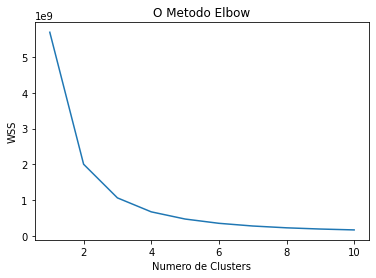

time: 5min 34s (started: 2022-11-07 02:05:06 +00:00)


In [ ]:
wcss = []
 
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'random')
    kmeans.fit(dfnumerico.values)
    print(i,kmeans.inertia_)
    wcss.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss)
plt.title('O Metodo Elbow')
plt.xlabel('Numero de Clusters')
plt.ylabel('WSS') #within cluster sum of squares
plt.show()

Aplica StandardScaler

In [ ]:
scaler = StandardScaler()
 
valuesStandardScaled = scaler.fit_transform(dfnumerico.values)
 
dfWithStandardScaler = pd.DataFrame(valuesStandardScaled)
dfWithStandardScaler.columns = ['Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006', 'Q007', 'Q008', 'Q009',
               'Q010', 'Q011', 'Q012', 'Q013', 'Q014', 'Q015', 'Q016', 'Q017', 'Q018',
               'Q019', 'Q020', 'Q021', 'Q022', 'Q023', 'Q024', 'Q025', 'SG_UF_RESIDENCIA', 'NU_IDADE', 
               'TP_SEXO', 'TP_COR_RACA', 'TP_DEPENDENCIA_ADM_ESC', 'MEDIA_GERAL']

time: 2.4 s (started: 2022-11-07 02:10:40 +00:00)


Aplica validação WSS no dfWithStandardScaler

1 23048189.999999933
2 18607188.18295739
3 16975456.96865956
4 16279491.46698063
5 15818520.931266129
6 15452961.34596915
7 14988660.031022348
8 14720117.295306819
9 14294347.456104476
10 14064203.974323103


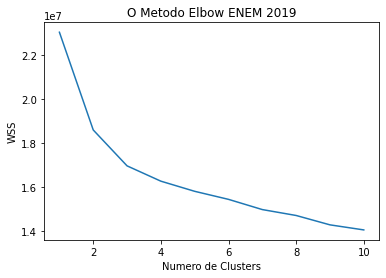

time: 5min (started: 2022-11-07 02:10:42 +00:00)


In [ ]:
wcss = []
 
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'random')
    kmeans.fit(dfWithStandardScaler.values)
    print(i,kmeans.inertia_)
    wcss.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss)
plt.title('O Metodo Elbow ENEM 2019')
plt.xlabel('Numero de Clusters')
plt.ylabel('WSS') #within cluster sum of squares
plt.show()

Aplica o algoritmo k-means no dfWithStandardScaler

In [ ]:
kmeans = KMeans(n_clusters= 3)

clusters_labels = kmeans.fit_predict(dfWithStandardScaler.values)
 
dfWithStandardScaler['clusters'] = clusters_labels

time: 9.54 s (started: 2022-11-07 02:15:43 +00:00)


Aplicar clusters no dataset "normal"

In [ ]:
dfnumerico['clusters'] = dfWithStandardScaler['clusters']

time: 4.22 ms (started: 2022-11-07 02:15:52 +00:00)


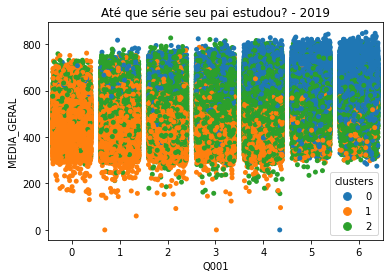

time: 19.4 s (started: 2022-11-07 02:15:52 +00:00)


In [ ]:
sns.stripplot(x="Q001", y="MEDIA_GERAL", hue=dfnumerico['clusters'], data=dfnumerico, jitter=0.4)
plt.title('Até que série seu pai estudou? - ' + year)
plt.show()

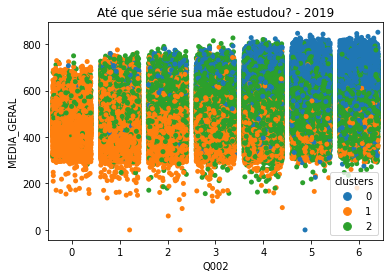

time: 32.1 s (started: 2022-11-07 02:16:12 +00:00)


In [ ]:
sns.stripplot(x="Q002", y="MEDIA_GERAL", hue=dfnumerico['clusters'], data=dfnumerico, jitter=0.4)
plt.title('Até que série sua mãe estudou? - ' + year)
plt.show()

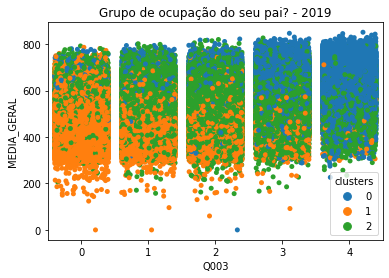

time: 31.6 s (started: 2022-11-07 02:16:44 +00:00)


In [ ]:
sns.stripplot(x="Q003", y="MEDIA_GERAL", hue=dfnumerico['clusters'], data=dfnumerico, jitter=0.4)
plt.title('Grupo de ocupação do seu pai? - ' + year)
plt.show()

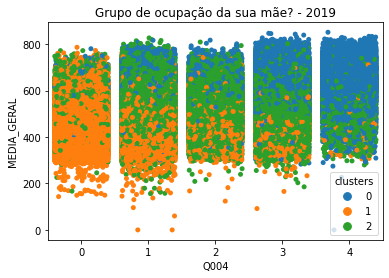

time: 30.6 s (started: 2022-11-07 02:17:15 +00:00)


In [ ]:
sns.stripplot(x="Q004", y="MEDIA_GERAL", hue=dfnumerico['clusters'], data=dfnumerico, jitter=0.4)
plt.title('Grupo de ocupação da sua mãe? - ' + year)
plt.show()

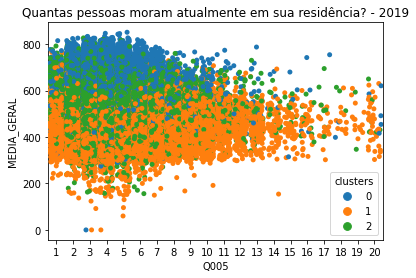

time: 20.5 s (started: 2022-11-07 02:17:46 +00:00)


In [ ]:
sns.stripplot(x="Q005", y="MEDIA_GERAL", hue=dfnumerico['clusters'], data=dfnumerico, jitter=0.4)
plt.title('Quantas pessoas moram atualmente em sua residência? - ' + year)
plt.show()

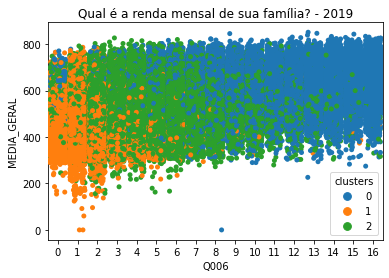

time: 19.9 s (started: 2022-11-07 02:18:06 +00:00)


In [ ]:
sns.stripplot(x="Q006", y="MEDIA_GERAL", hue=dfnumerico['clusters'], data=dfnumerico, jitter=0.4)
plt.title('Qual é a renda mensal de sua família? - ' + year)
plt.show()

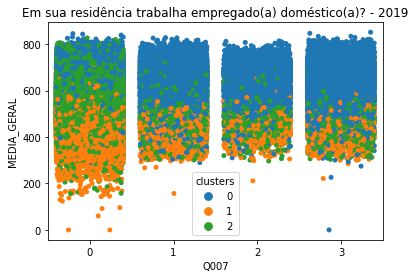

time: 26.7 s (started: 2022-11-07 02:18:26 +00:00)


In [ ]:
sns.stripplot(x="Q007", y="MEDIA_GERAL", hue=dfnumerico['clusters'], data=dfnumerico, jitter=0.4)
plt.title('Em sua residência trabalha empregado(a) doméstico(a)? - ' + year)
plt.show()

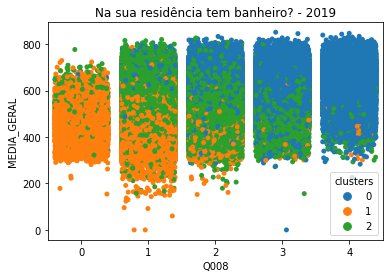

time: 30.7 s (started: 2022-11-07 02:18:53 +00:00)


In [ ]:
sns.stripplot(x="Q008", y="MEDIA_GERAL", hue=dfnumerico['clusters'], data=dfnumerico, jitter=0.4)
plt.title('Na sua residência tem banheiro? - ' + year)
plt.show()

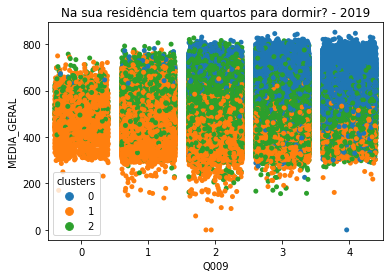

time: 30.5 s (started: 2022-11-07 02:19:24 +00:00)


In [ ]:
sns.stripplot(x="Q009", y="MEDIA_GERAL", hue=dfnumerico['clusters'], data=dfnumerico, jitter=0.4)
plt.title('Na sua residência tem quartos para dormir? - ' + year)
plt.show()

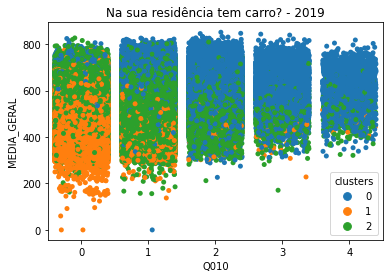

time: 18.9 s (started: 2022-11-07 02:19:54 +00:00)


In [ ]:
sns.stripplot(x="Q010", y="MEDIA_GERAL", hue=dfnumerico['clusters'], data=dfnumerico, jitter=0.4)
plt.title('Na sua residência tem carro? - ' + year)
plt.show()

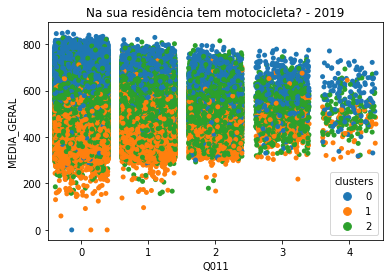

time: 18.7 s (started: 2022-11-07 02:20:13 +00:00)


In [ ]:
sns.stripplot(x="Q011", y="MEDIA_GERAL", hue=dfnumerico['clusters'], data=dfnumerico, jitter=0.4)
plt.title('Na sua residência tem motocicleta? - ' + year)
plt.show()

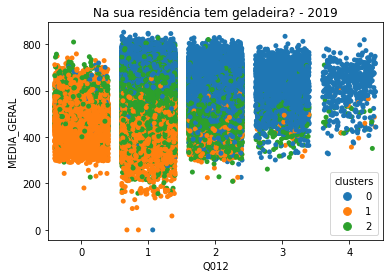

time: 20.4 s (started: 2022-11-07 02:20:32 +00:00)


In [ ]:
sns.stripplot(x="Q012", y="MEDIA_GERAL", hue=dfnumerico['clusters'], data=dfnumerico, jitter=0.4)
plt.title('Na sua residência tem geladeira? - ' + year)
plt.show()

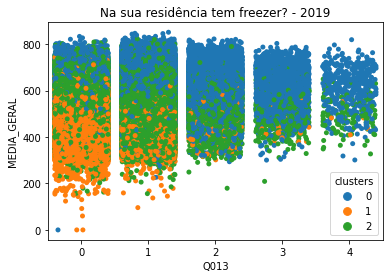

time: 18.3 s (started: 2022-11-07 02:20:52 +00:00)


In [ ]:
sns.stripplot(x="Q013", y="MEDIA_GERAL", hue=dfnumerico['clusters'], data=dfnumerico, jitter=0.4)
plt.title('Na sua residência tem freezer? - ' + year)
plt.show()

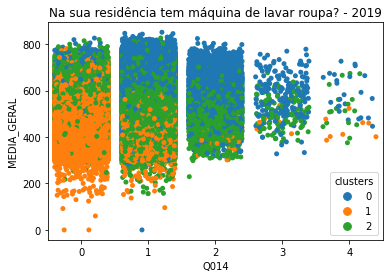

time: 18.2 s (started: 2022-11-07 02:21:11 +00:00)


In [ ]:
sns.stripplot(x="Q014", y="MEDIA_GERAL", hue=dfnumerico['clusters'], data=dfnumerico, jitter=0.4)
plt.title('Na sua residência tem máquina de lavar roupa? - ' + year)
plt.show()

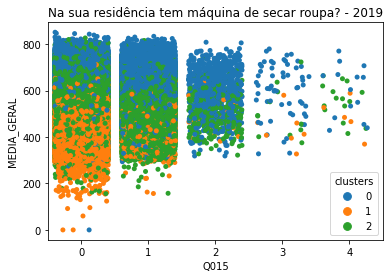

time: 18 s (started: 2022-11-07 02:21:29 +00:00)


In [ ]:
sns.stripplot(x="Q015", y="MEDIA_GERAL", hue=dfnumerico['clusters'], data=dfnumerico, jitter=0.4)
plt.title('Na sua residência tem máquina de secar roupa? - ' + year)
plt.show()

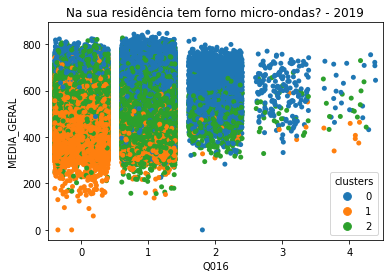

time: 18 s (started: 2022-11-07 02:21:47 +00:00)


In [ ]:
sns.stripplot(x="Q016", y="MEDIA_GERAL", hue=dfnumerico['clusters'], data=dfnumerico, jitter=0.4)
plt.title('Na sua residência tem forno micro-ondas? - ' + year)
plt.show()

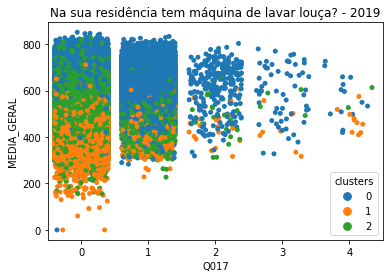

time: 18.3 s (started: 2022-11-07 02:22:05 +00:00)


In [ ]:
sns.stripplot(x="Q017", y="MEDIA_GERAL", hue=dfnumerico['clusters'], data=dfnumerico, jitter=0.4)
plt.title('Na sua residência tem máquina de lavar louça? - ' + year)
plt.show()

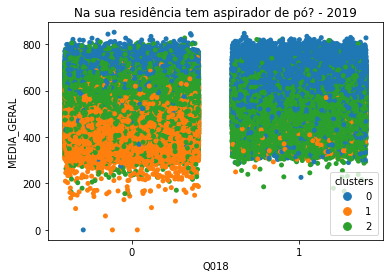

time: 28.7 s (started: 2022-11-07 02:22:23 +00:00)


In [ ]:
sns.stripplot(x="Q018", y="MEDIA_GERAL", hue=dfnumerico['clusters'], data=dfnumerico, jitter=0.4)
plt.title('Na sua residência tem aspirador de pó? - ' + year)
plt.show()

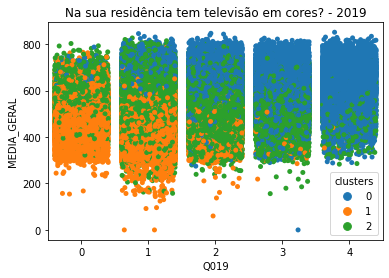

time: 17.8 s (started: 2022-11-07 02:22:52 +00:00)


In [ ]:
sns.stripplot(x="Q019", y="MEDIA_GERAL", hue=dfnumerico['clusters'], data=dfnumerico, jitter=0.4)
plt.title('Na sua residência tem televisão em cores? - ' + year)
plt.show()

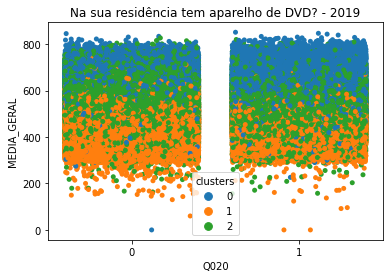

time: 28.6 s (started: 2022-11-07 02:23:10 +00:00)


In [ ]:
sns.stripplot(x="Q020", y="MEDIA_GERAL", hue=dfnumerico['clusters'], data=dfnumerico, jitter=0.4)
plt.title('Na sua residência tem aparelho de DVD? - ' + year)
plt.show()

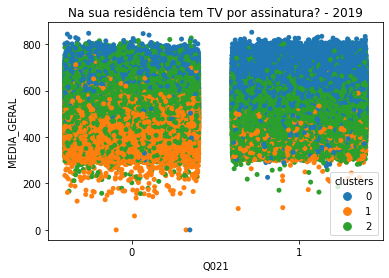

time: 32.5 s (started: 2022-11-07 02:23:38 +00:00)


In [ ]:
sns.stripplot(x="Q021", y="MEDIA_GERAL", hue=dfnumerico['clusters'], data=dfnumerico, jitter=0.4)
plt.title('Na sua residência tem TV por assinatura? - ' + year)
plt.show()

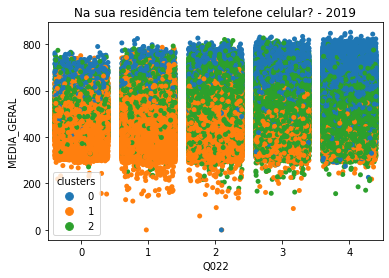

time: 29.4 s (started: 2022-11-07 02:24:11 +00:00)


In [ ]:
sns.stripplot(x="Q022", y="MEDIA_GERAL", hue=dfnumerico['clusters'], data=dfnumerico, jitter=0.4)
plt.title('Na sua residência tem telefone celular? - ' + year)
plt.show()

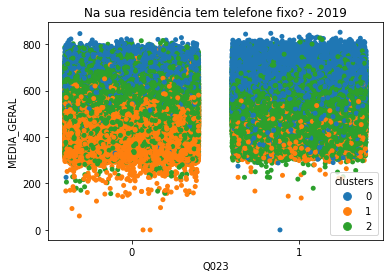

time: 30.1 s (started: 2022-11-07 02:24:40 +00:00)


In [ ]:
sns.stripplot(x="Q023", y="MEDIA_GERAL", hue=dfnumerico['clusters'], data=dfnumerico, jitter=0.4)
plt.title('Na sua residência tem telefone fixo? - ' + year)
plt.show()

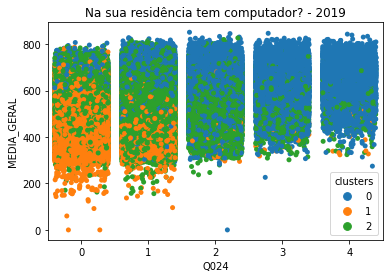

time: 17.8 s (started: 2022-11-07 02:25:10 +00:00)


In [ ]:
sns.stripplot(x="Q024", y="MEDIA_GERAL", hue=dfnumerico['clusters'], data=dfnumerico, jitter=0.4)
plt.title('Na sua residência tem computador? - ' + year)
plt.show()

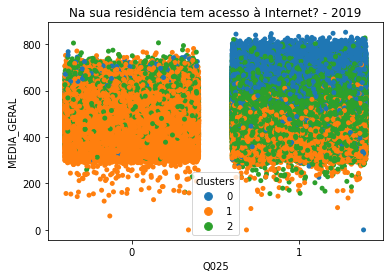

time: 28.4 s (started: 2022-11-07 02:25:28 +00:00)


In [ ]:
sns.stripplot(x="Q025", y="MEDIA_GERAL", hue=dfnumerico['clusters'], data=dfnumerico, jitter=0.4)
plt.title('Na sua residência tem acesso à Internet? - ' + year)
plt.show()

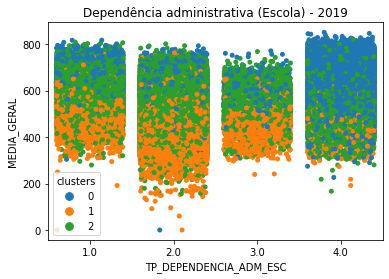

time: 29.2 s (started: 2022-11-07 02:25:57 +00:00)


In [ ]:
sns.stripplot(x="TP_DEPENDENCIA_ADM_ESC", y="MEDIA_GERAL", hue=dfnumerico['clusters'], data=dfnumerico, jitter=0.4)
plt.title('Dependência administrativa (Escola) - ' + year)
plt.show()

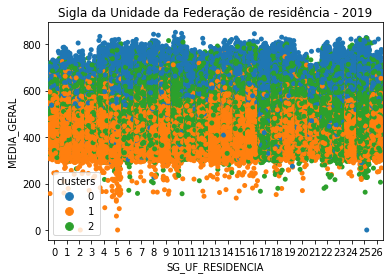

time: 33.3 s (started: 2022-11-07 02:26:26 +00:00)


In [ ]:
sns.stripplot(x="SG_UF_RESIDENCIA", y="MEDIA_GERAL", hue=dfnumerico['clusters'], data=dfnumerico, jitter=0.4)
plt.title('Sigla da Unidade da Federação de residência - ' + year)
plt.show()

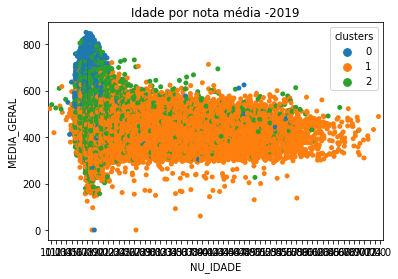

time: 30.6 s (started: 2022-11-07 02:26:59 +00:00)


In [ ]:
sns.stripplot(x="NU_IDADE", y="MEDIA_GERAL", hue=dfnumerico['clusters'], data=dfnumerico, jitter=0.4)
plt.title('Idade por nota média -' + year)
plt.show()

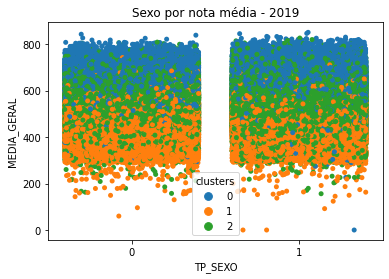

time: 28.5 s (started: 2022-11-07 02:27:30 +00:00)


In [ ]:
sns.stripplot(x="TP_SEXO", y="MEDIA_GERAL", hue=dfnumerico['clusters'], data=dfnumerico, jitter=0.4)
plt.title('Sexo por nota média - ' + year)
plt.show()

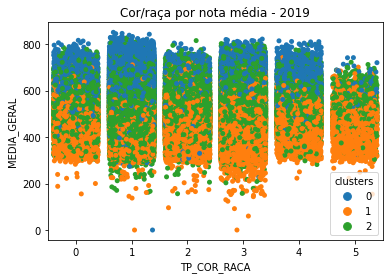

time: 29.3 s (started: 2022-11-07 02:27:58 +00:00)


In [ ]:
sns.stripplot(x="TP_COR_RACA", y="MEDIA_GERAL", hue=dfnumerico['clusters'], data=dfnumerico, jitter=0.4)
plt.title('Cor/raça por nota média - ' + year)
plt.show()

PCA

In [ ]:
#from sklearn.decomposition import PCA

time: 443 µs (started: 2022-11-07 02:28:28 +00:00)


In [ ]:
#df = dfnumerico.copy()
#dfpca = df.drop('MEDIA_GERAL', 1)
#dfpca = dfpca.drop('clusters', 1)

time: 660 µs (started: 2022-11-07 02:28:28 +00:00)


In [ ]:
#reduced_data = PCA(n_components=1).fit_transform(dfpca)
#results = pd.DataFrame(reduced_data,columns=['pca1'])
#results['MEDIA_GERAL'] = df['MEDIA_GERAL']
#results['clusters'] = df['clusters']

#sns.scatterplot(x="pca1", y="MEDIA_GERAL", hue=results['clusters'], data=results)
#plt.title('K-means Clustering com 2 dimensões')
#plt.show()

time: 554 µs (started: 2022-11-07 02:28:28 +00:00)
